# COVID-19 Data Analysis

In [1]:
import os
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
today = date.today()
data_dir = 'data'
us_data_dir = data_dir + '/us'
global_data_dir = data_dir + '/global'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)
if not os.path.exists(us_data_dir):
    os.mkdir(us_data_dir)
if not os.path.exists(global_data_dir):
    os.mkdir(global_data_dir)

for dir in [us_data_dir, global_data_dir]:
    file_list = [f for f in os.listdir(dir)]
    for f in file_list:
        if str(today) != str(f)[:len(str(today))]:
            os.remove(os.path.join(dir, f))

## Get John Hopkins Data from GitHub

In [3]:
def get_corona_data(case_type, scope):
    if not os.path.exists(f'./data/{scope}/{today}_{case_type}'):
        csv_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{case_type}_{scope}.csv'
        df = pd.read_csv(csv_url)
        df.to_csv(f'./data/{scope}/{today}_{case_type}')

## Summary of Data

Get the amount of confirmed cases, deaths, and the fatality rate

In [4]:
def get_case_count(case_type, scope):
    df = pd.read_csv(f'./data/{scope}/{today}_{case_type}')
    count = df[df.columns[-1]].sum()
    return count

In [5]:
def fatality_rate(confirmed_cases, deaths):
    return round(deaths / confirmed_cases * 100, 2)

## US Data

In [6]:
get_corona_data('confirmed', 'US')
get_corona_data('deaths', 'US')
us_confirmed_cases = get_case_count('confirmed', 'US')
us_deaths = get_case_count('deaths', 'US')
us_fatality_rate = fatality_rate(us_confirmed_cases, us_deaths)

In [28]:
longest_title = len('Confirmed Cases: ')
longest_number = len('1,000,000')
print('Confirmed Cases:'.ljust(longest_title), f'{us_confirmed_cases:,}'.rjust(longest_number))
print(f'Deaths:'.ljust(longest_title), f'{us_deaths:,}'.rjust(longest_number))
print('Fatality Rate:'.ljust(longest_title), f'{us_fatality_rate}%'.rjust(longest_number))

Confirmed Cases:    869,170
Deaths:              49,954
Fatality Rate:        5.75%


## Global Data

In [8]:
get_corona_data('confirmed', 'global')
get_corona_data('deaths', 'global')
global_confirmed_cases = get_case_count('confirmed', 'global')
global_deaths = get_case_count('deaths', 'global')
global_fatality_rate = fatality_rate(global_confirmed_cases, global_deaths)

In [29]:
print('Confirmed Cases:'.ljust(longest_title), f'{global_confirmed_cases:,}'.rjust(longest_number))
print(f'Deaths:'.ljust(longest_title), f'{global_deaths:,}'.rjust(longest_number))
print('Fatality Rate:'.ljust(longest_title), f'{global_fatality_rate}%'.rjust(longest_number))

Confirmed Cases:  2,708,884
Deaths:             190,857
Fatality Rate:        7.05%


In [10]:
def get_df(case_type, scope):
    df = pd.read_csv(f'./data/{scope}/{today}_{case_type}')
    return(df.loc[:, '1/22/20':])

us_confirmed_ts = get_df('confirmed', 'us').sum()
us_deaths_ts = get_df('deaths', 'us').sum()

In [11]:
daily_cases = np.array([us_confirmed_ts[i] - us_confirmed_ts[i-1] for i in range(1, len(us_confirmed_ts))])
daily_deaths = np.array([us_deaths_ts[i] - us_deaths_ts[i-1] for i in range(1, len(us_deaths_ts))])
x = np.arange(0, len(daily_cases))

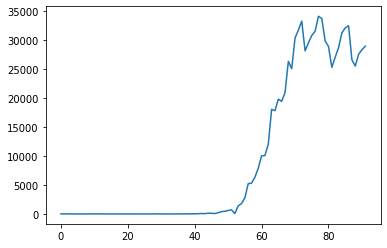

In [12]:
plt.plot(daily_cases)

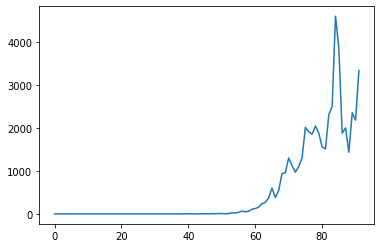

In [13]:
plt.plot(daily_deaths)